In [2]:
# @title Imported  necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the training and test data

In [3]:
train = pd.read_json("/content/drive/MyDrive/train.json")
test = pd.read_json("/content/drive/MyDrive/test.json")
train

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [4]:
test

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."
...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo..."
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc..."
9941,22339,"[black pepper, salt, parmigiano reggiano chees..."
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato..."


In [5]:
df = train
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [6]:
df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

## Count of cuisines

<ipython-input-7-895d704f2fd4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cuisine', data=df, palette='viridis')


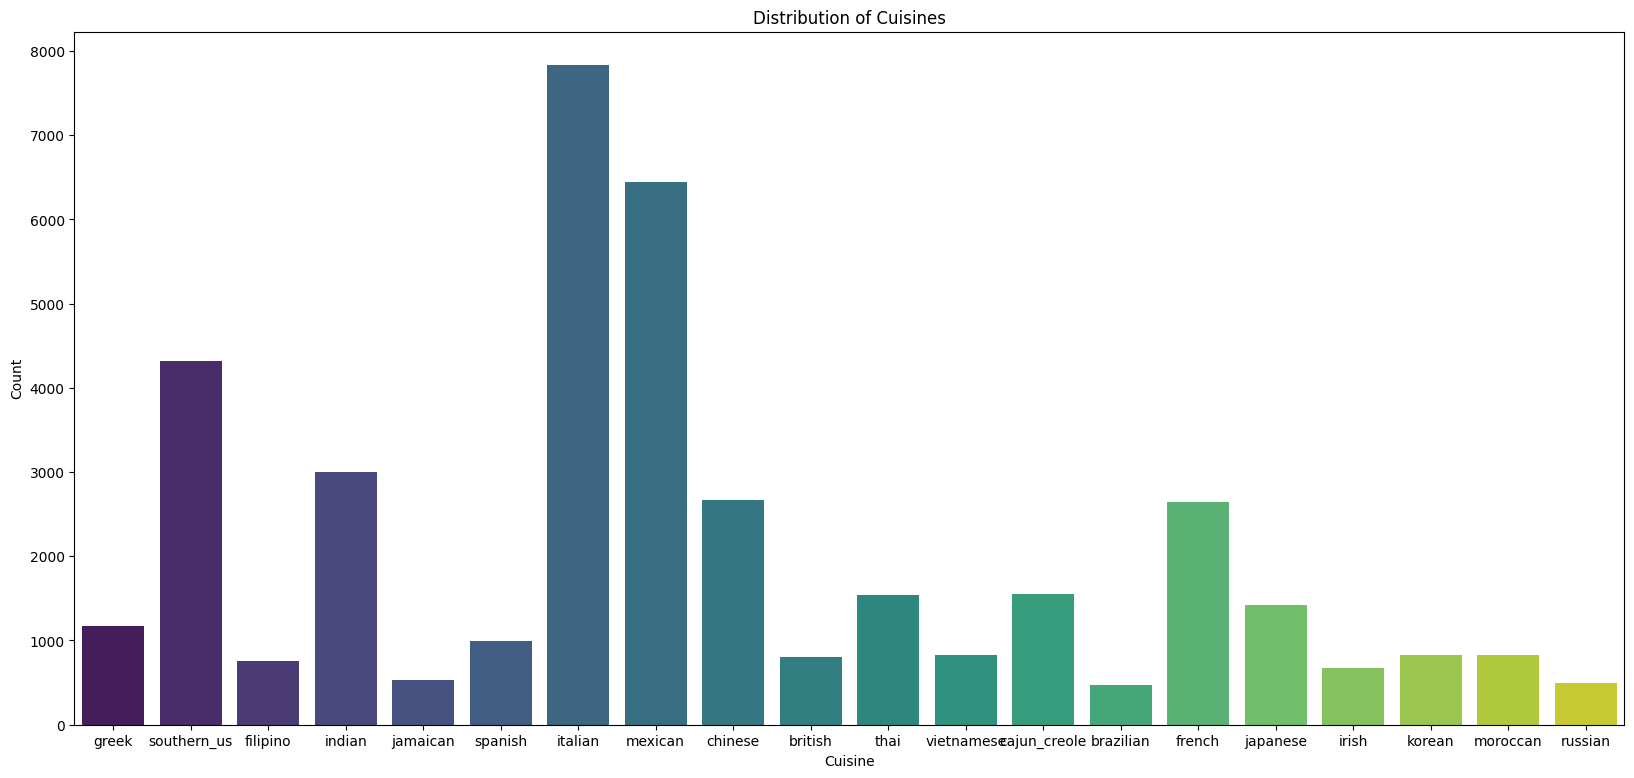

In [7]:
plt.figure(figsize=(20, 9))
sns.countplot(x='cuisine', data=df, palette='viridis')
plt.title('Distribution of Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

## Distribution of the number of ingredients

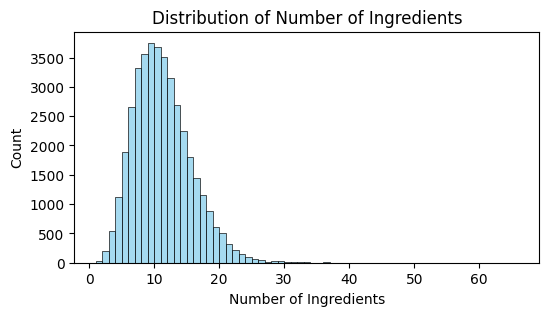

In [8]:
plt.figure(figsize=(6, 3))
sns.histplot(df['ingredients'].apply(len), bins=range(1, max(df['ingredients'].apply(len)) + 2), kde=False, color='skyblue')
plt.title('Distribution of Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Count')
plt.show()

# Boxplot for the number of ingredients by cuisine

<ipython-input-9-7b8e65aa2dff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine', y=df['ingredients'].apply(len), data=df, palette='Set3')


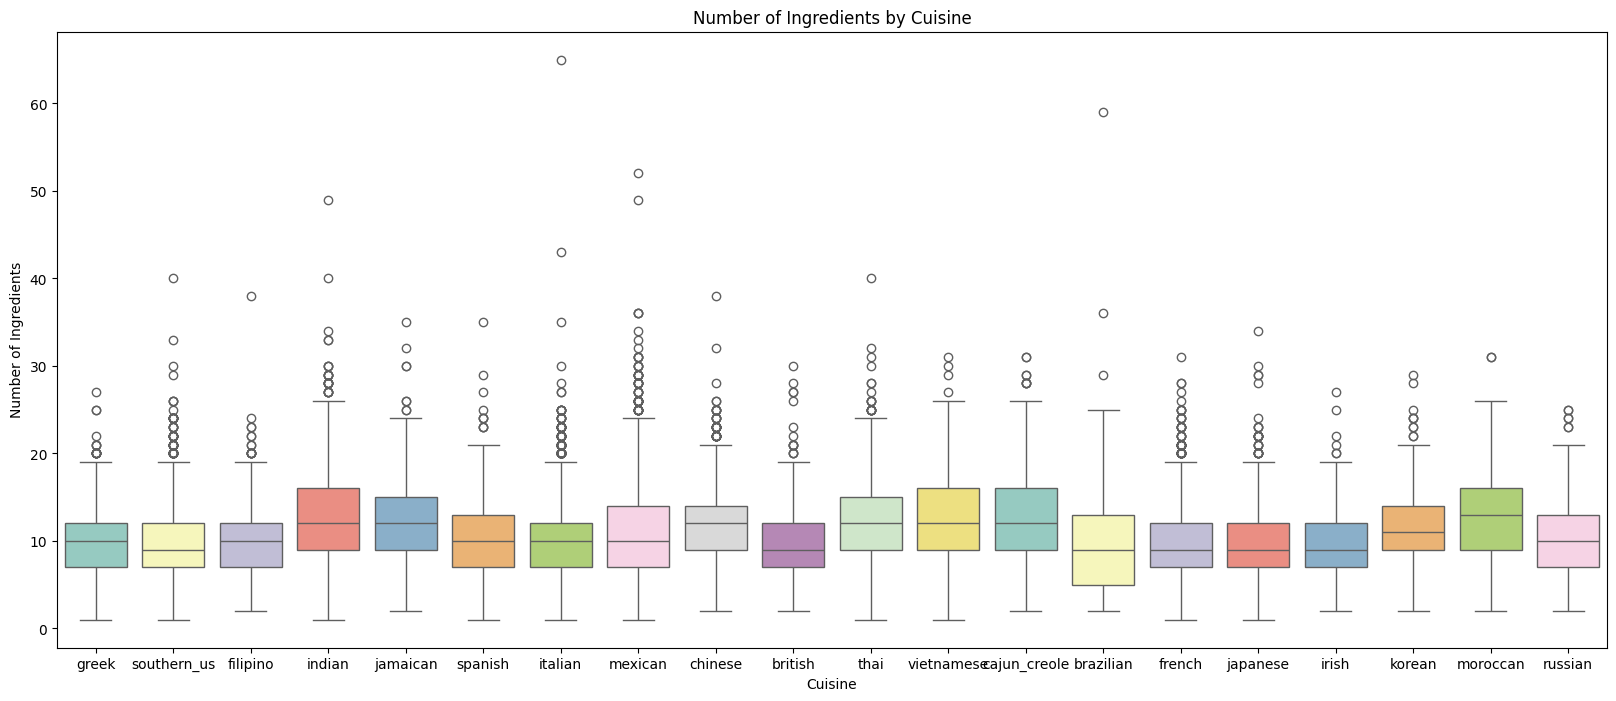

In [9]:
plt.figure(figsize=(20,8))
sns.boxplot(x='cuisine', y=df['ingredients'].apply(len), data=df, palette='Set3')
plt.title('Number of Ingredients by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Number of Ingredients')
plt.show()

<Figure size 1500x1000 with 0 Axes>

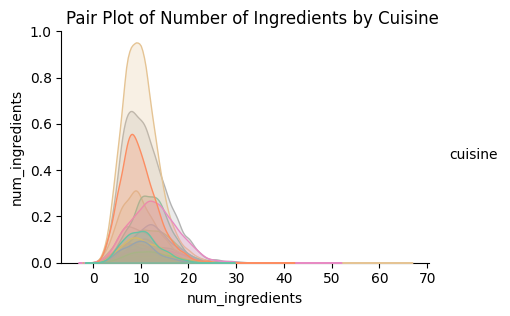

In [10]:
df['num_ingredients'] = df['ingredients'].apply(len)

# Pair plot
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='cuisine', vars=['num_ingredients'], palette='Set2', height=3, aspect=1.5)
plt.suptitle('Pair Plot of Number of Ingredients by Cuisine', y=1.02)
plt.show()

## Count number of ingredients

<ipython-input-11-49d0a135cfdb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ingredient', data=ingredient_counts.head(20), palette='viridis')


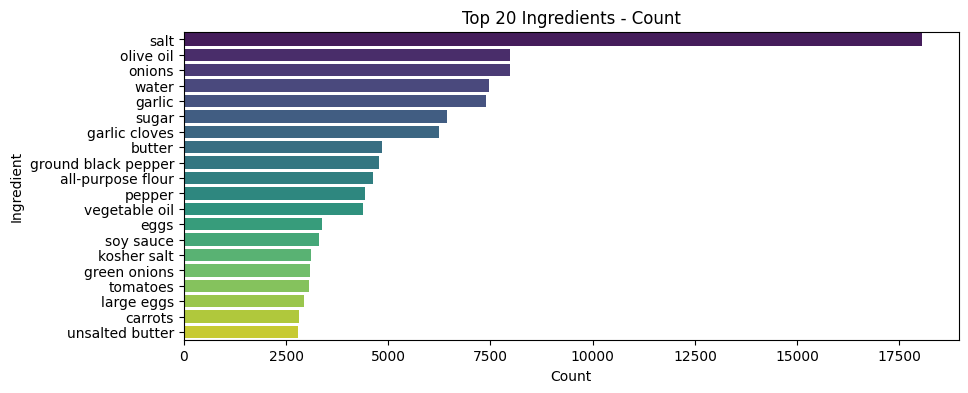

In [11]:
# Flatten the list of ingredients to count occurrences
all_ingredients = [ingredient for ingredients_list in df['ingredients'] for ingredient in ingredients_list]

# Create a DataFrame for ingredient counts
ingredient_counts = pd.Series(all_ingredients).value_counts().reset_index()
ingredient_counts.columns = ['ingredient', 'count']

# Plot the count of ingredients
plt.figure(figsize=(10, 4))
sns.barplot(x='count', y='ingredient', data=ingredient_counts.head(20), palette='viridis')
plt.title('Top 20 Ingredients - Count')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.show()

# Wordcloud Representation to know  which coutry uses which ingredients most.

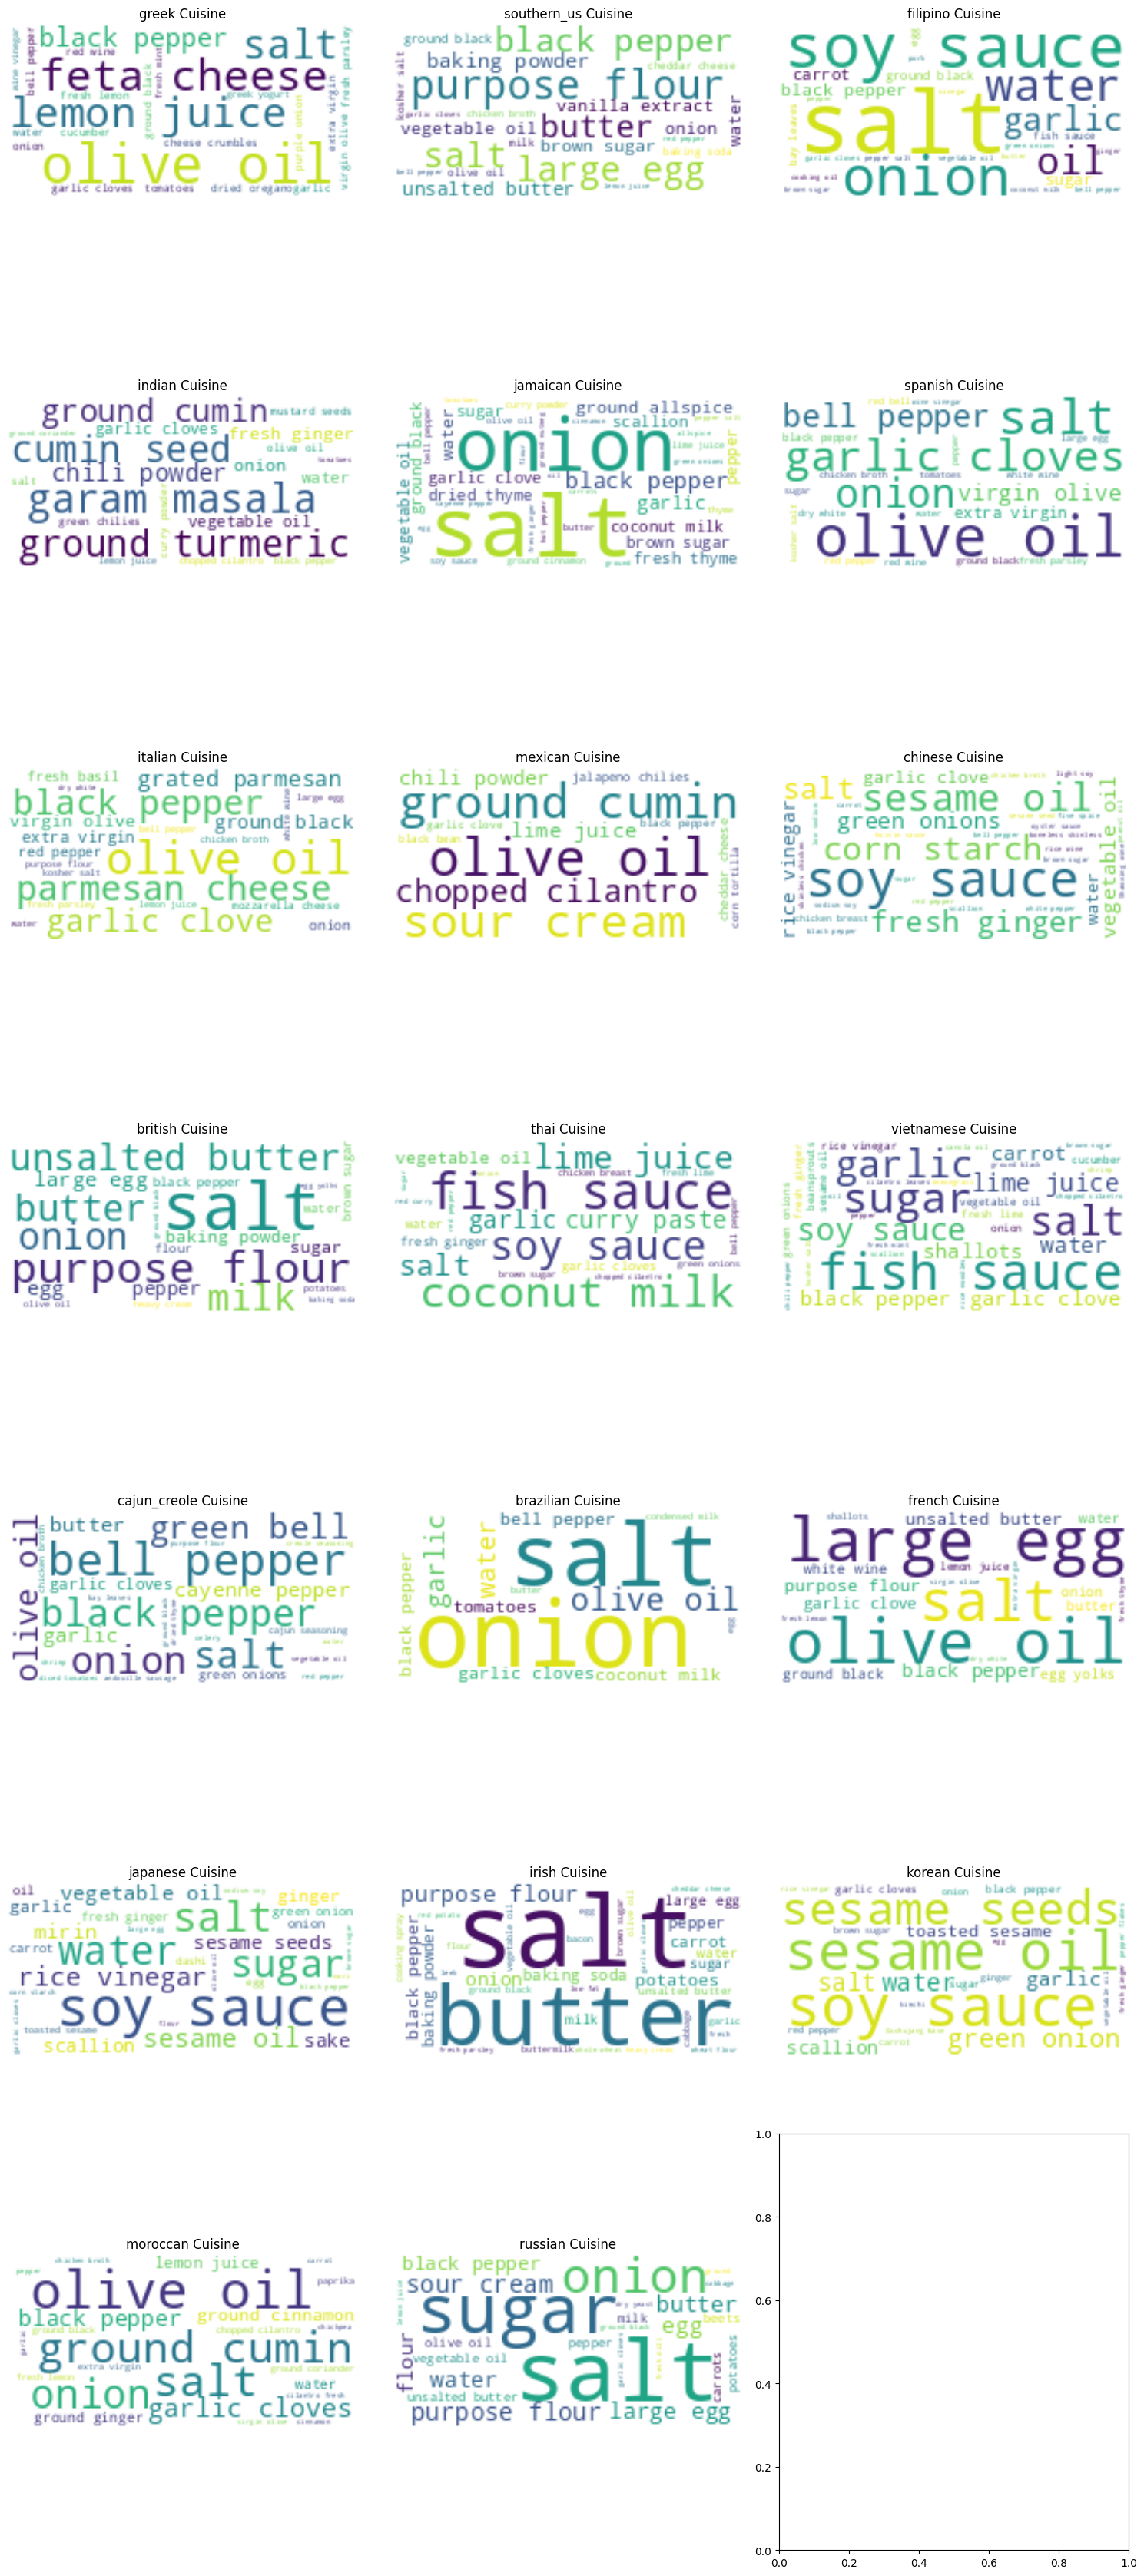

In [12]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

# Set the number of columns based on the number of unique cuisines
num_cuisines = len(df['cuisine'].unique())
num_columns = 3  # Set the number of columns for the horizontal list view

# Calculate the number of rows needed
num_rows = int(np.ceil(num_cuisines / num_columns))

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Create a word cloud for each cuisine
for i, cuisine in enumerate(df['cuisine'].unique()):
    # Concatenate all ingredients for the current cuisine
    cuisine_ingredients = ' '.join(df[df['cuisine'] == cuisine]['ingredients'].apply(lambda x: ' '.join(x)))

    # Generate word cloud
    wordcloud = WordCloud(width=200, height=100, background_color='white').generate(cuisine_ingredients)

    # Plot the word cloud on the corresponding subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'{cuisine} Cuisine')
    axes[i].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Using **Multinomial Naive Bayes classifier**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Combine the original training data and the separate test data for vectorization
combined_data = pd.concat([df['ingredients'].apply(lambda x: ' '.join(x)), test['ingredients'].apply(lambda x: ' '.join(x))])

# Vectorize the ingredients using CountVectorizer
vectorizer = CountVectorizer()
combined_data_vectorized = vectorizer.fit_transform(combined_data)

# Split the combined data back into training and test sets
X_train_vectorized = combined_data_vectorized[:len(df)]
X_test_vectorized = combined_data_vectorized[len(df):]

# Split the original training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df['ingredients'].apply(lambda x: ' '.join(x)), df['cuisine'], test_size=0.2, random_state=42)
X_val_vectorized = vectorizer.transform(X_val)

# Train a Multinomial Naive Bayes classifier on the training data
model = MultinomialNB()
model.fit(X_train_vectorized, df['cuisine'])

# Make predictions on the validation set
val_predictions = model.predict(X_val_vectorized)

# Print validation losses and accuracy score
val_losses = model.score(X_val_vectorized, y_val)
accuracy = accuracy_score(y_val, val_predictions)

print(f"Validation Loss: {1 - val_losses:.2f}")
print(f"Accuracy Score: {accuracy:.2f}")

# Print the confusion matrix and classification report for the validation set
conf_matrix = confusion_matrix(y_val, val_predictions)
class_report = classification_report(y_val, val_predictions)

print("\nClassification Report:")
print(class_report)

Validation Loss: 0.26
Accuracy Score: 0.74

Classification Report:
              precision    recall  f1-score   support

   brazilian       0.59      0.46      0.52        84
     british       0.42      0.54      0.47       157
cajun_creole       0.61      0.77      0.68       328
     chinese       0.73      0.89      0.80       510
    filipino       0.73      0.45      0.55       136
      french       0.58      0.57      0.58       550
       greek       0.67      0.70      0.68       249
      indian       0.86      0.86      0.86       602
       irish       0.63      0.40      0.49       151
     italian       0.85      0.79      0.82      1567
    jamaican       0.78      0.56      0.65        91
    japanese       0.90      0.64      0.75       284
      korean       0.83      0.76      0.79       166
     mexican       0.91      0.88      0.90      1336
    moroccan       0.75      0.80      0.77       166
     russian       0.55      0.44      0.49        89
 southern_us  

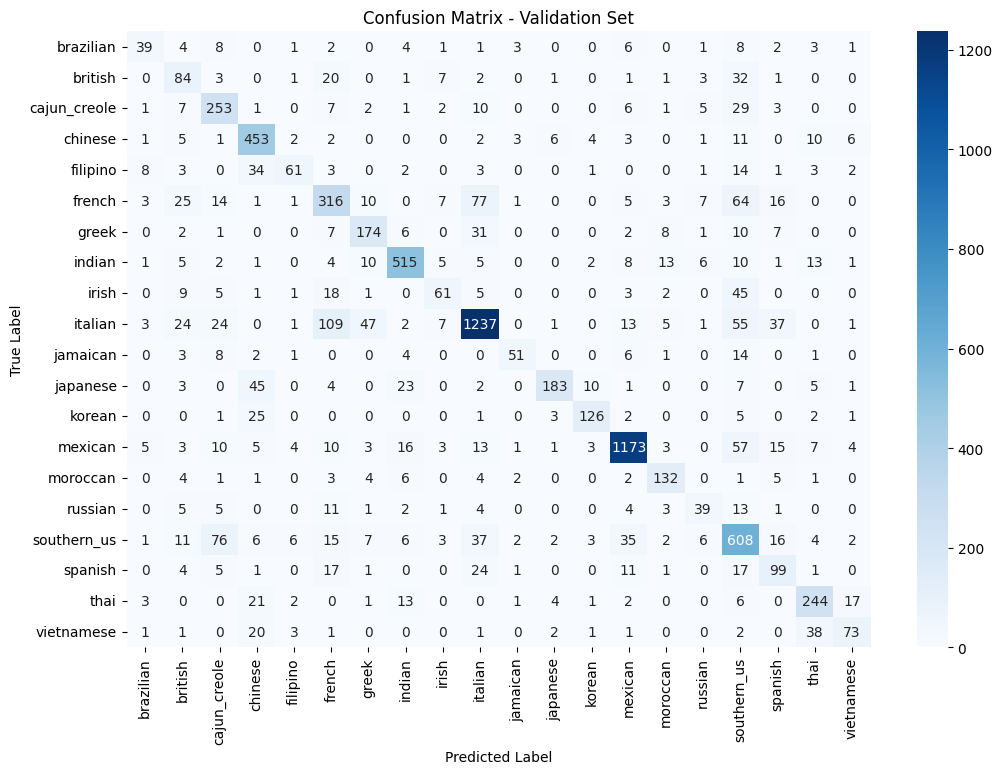

In [14]:
# Visualize the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Using **XGBOOST Model**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Split the data into training, validation, and testing sets
X_train_text, X_val_text, y_train, y_val = train_test_split(
    df['ingredients'].apply(lambda x: ' '.join(x)),
    df['cuisine'],
    test_size=0.2,
    random_state=42
)

# Separate test set
X_test_text = test['ingredients'].apply(lambda x: ' '.join(x))

# Encode cuisine labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Vectorize the ingredients using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_text)
X_val_vectorized = vectorizer.transform(X_val_text)
X_test_vectorized = vectorizer.transform(X_test_text)

# Train an XGBoost classifier
model = XGBClassifier(objective='multi:softmax', num_class=len(df['cuisine'].unique()))
eval_set = [(X_train_vectorized, y_train_encoded), (X_val_vectorized, y_val_encoded)]
model.fit(X_train_vectorized, y_train_encoded, eval_set=eval_set, verbose=True)

# Make predictions on the validation set
val_predictions = model.predict(X_val_vectorized)

# Decode predictions back to original cuisine labels
val_pred_labels = label_encoder.inverse_transform(val_predictions)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, val_pred_labels)
conf_matrix_val = confusion_matrix(y_val, val_pred_labels)
class_report_val = classification_report(y_val, val_pred_labels)

print(f"Validation Accuracy: {val_accuracy:.2f}")
print("\nClassification Report (Validation Set):")
print(class_report_val)


[0]	validation_0-mlogloss:1.91123	validation_1-mlogloss:1.94425
[1]	validation_0-mlogloss:1.65426	validation_1-mlogloss:1.70105
[2]	validation_0-mlogloss:1.48331	validation_1-mlogloss:1.53787
[3]	validation_0-mlogloss:1.35464	validation_1-mlogloss:1.41795
[4]	validation_0-mlogloss:1.25066	validation_1-mlogloss:1.32604
[5]	validation_0-mlogloss:1.17055	validation_1-mlogloss:1.25385
[6]	validation_0-mlogloss:1.10500	validation_1-mlogloss:1.19690
[7]	validation_0-mlogloss:1.04805	validation_1-mlogloss:1.14829
[8]	validation_0-mlogloss:1.00051	validation_1-mlogloss:1.10853
[9]	validation_0-mlogloss:0.95903	validation_1-mlogloss:1.07413
[10]	validation_0-mlogloss:0.92228	validation_1-mlogloss:1.04624
[11]	validation_0-mlogloss:0.89106	validation_1-mlogloss:1.02284
[12]	validation_0-mlogloss:0.86113	validation_1-mlogloss:1.00097
[13]	validation_0-mlogloss:0.83307	validation_1-mlogloss:0.98114
[14]	validation_0-mlogloss:0.81202	validation_1-mlogloss:0.96507
[15]	validation_0-mlogloss:0.79049	

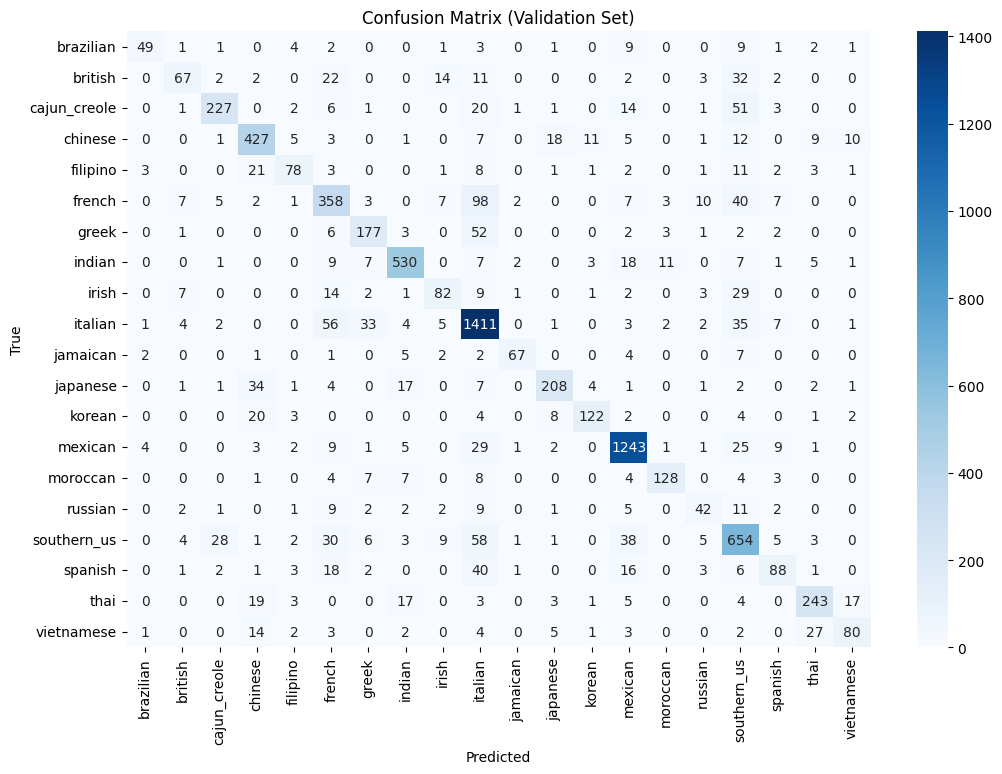

In [16]:
# Plot the confusion matrix as a heatmap for the validation set
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Using **CNN Model**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode the cuisine labels
label_encoder = LabelEncoder()
df['cuisine_encoded'] = label_encoder.fit_transform(df['cuisine'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['ingredients'].apply(lambda x: ' '.join(x)), df['cuisine_encoded'], test_size=0.2, random_state=42)

# Tokenize the ingredients
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
max_sequence_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Define the CNN model
embedding_dim = 50
num_filters = 64
filter_sizes = [3, 4, 5]

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
for filter_size in filter_sizes:
    model.add(Conv1D(filters=num_filters, kernel_size=filter_size, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(df['cuisine'].unique()), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_padded, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])
# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_decoded = label_encoder.inverse_transform(y_test)


Epoch 1/20
398/398 [==============================] - 22s 46ms/step - loss: 2.0522 - accuracy: 0.3788 - val_loss: 1.4043 - val_accuracy: 0.5778
Epoch 2/20
398/398 [==============================] - 6s 15ms/step - loss: 1.3515 - accuracy: 0.5956 - val_loss: 1.1907 - val_accuracy: 0.6372
Epoch 3/20
398/398 [==============================] - 3s 8ms/step - loss: 1.1347 - accuracy: 0.6590 - val_loss: 1.0857 - val_accuracy: 0.6713
Epoch 4/20
398/398 [==============================] - 4s 9ms/step - loss: 1.0232 - accuracy: 0.6903 - val_loss: 1.0407 - val_accuracy: 0.6897
Epoch 5/20
398/398 [==============================] - 3s 7ms/step - loss: 0.9507 - accuracy: 0.7124 - val_loss: 1.0270 - val_accuracy: 0.7011
Epoch 6/20
398/398 [==============================] - 4s 9ms/step - loss: 0.8884 - accuracy: 0.7325 - val_loss: 0.9819 - val_accuracy: 0.7102
Epoch 7/20
398/398 [==============================] - 3s 8ms/step - loss: 0.8371 - accuracy: 0.7468 - val_loss: 1.0091 - val_accuracy: 0.7104
Epo

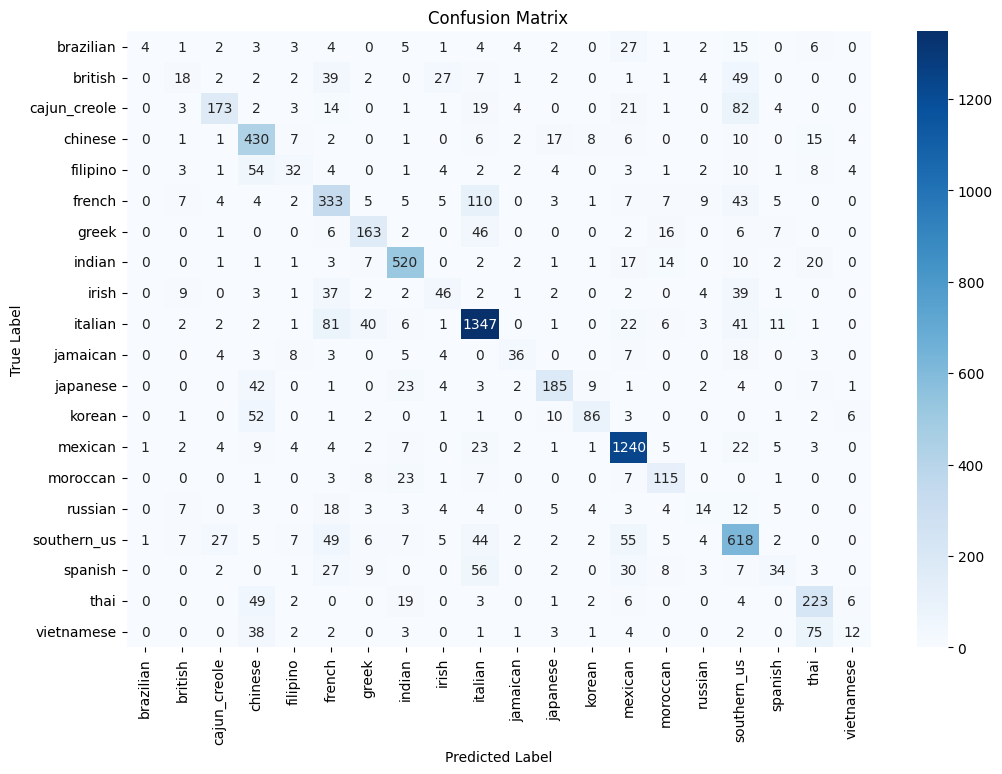

Accuracy: 0.71


In [18]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [19]:
# Display classification report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

   brazilian       0.67      0.05      0.09        84
     british       0.30      0.11      0.17       157
cajun_creole       0.77      0.53      0.63       328
     chinese       0.61      0.84      0.71       510
    filipino       0.42      0.24      0.30       136
      french       0.53      0.61      0.56       550
       greek       0.65      0.65      0.65       249
      indian       0.82      0.86      0.84       602
       irish       0.44      0.30      0.36       151
     italian       0.80      0.86      0.83      1567
    jamaican       0.61      0.40      0.48        91
    japanese       0.77      0.65      0.70       284
      korean       0.75      0.52      0.61       166
     mexican       0.85      0.93      0.89      1336
    moroccan       0.62      0.69      0.66       166
     russian       0.29      0.16      0.20        89
 southern_us       0.62      0.73      0.67       848
   

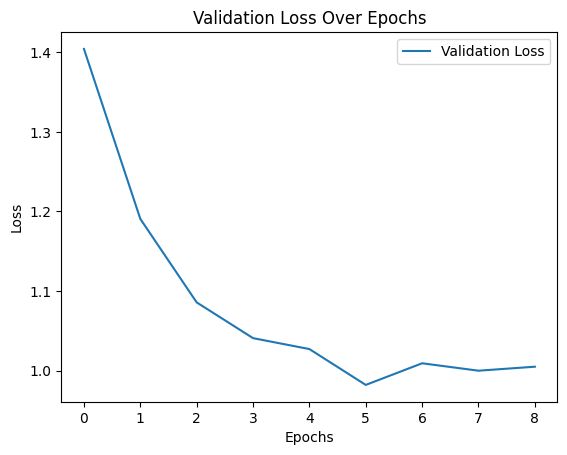

Validation Losses:
[1.4043173789978027, 1.1906808614730835, 1.0856865644454956, 1.040746808052063, 1.0270036458969116, 0.9819357395172119, 1.009144902229309, 0.9998202323913574, 1.0048322677612305]


In [20]:
# Plot validation losses over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print validation losses
print("Validation Losses:")
print(history.history['val_loss'])

# Using **Random Forest Model**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your DataFrame with the generated data

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(df['ingredients'].apply(lambda x: ' '.join(x)), df['cuisine'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Vectorize the ingredients using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_vectorized, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val_vectorized)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
class_report_val = classification_report(y_val, y_val_pred)

# Print evaluation metrics for validation set
print(f"Validation Accuracy: {accuracy_val:.2f}")
print("\nValidation Classification Report:")
print(class_report_val)

Validation Accuracy: 0.74

Validation Classification Report:
              precision    recall  f1-score   support

   brazilian       0.90      0.51      0.65        51
     british       0.93      0.32      0.48        78
cajun_creole       0.83      0.65      0.73       167
     chinese       0.73      0.86      0.79       257
    filipino       0.76      0.35      0.48        72
      french       0.57      0.48      0.52       261
       greek       0.79      0.48      0.60       124
      indian       0.81      0.89      0.85       278
       irish       0.81      0.36      0.50        73
     italian       0.70      0.94      0.80       792
    jamaican       1.00      0.50      0.67        40
    japanese       0.83      0.66      0.74       133
      korean       0.88      0.60      0.71        84
     mexican       0.84      0.92      0.88       669
    moroccan       0.89      0.57      0.70        96
     russian       0.82      0.27      0.41        51
 southern_us       0

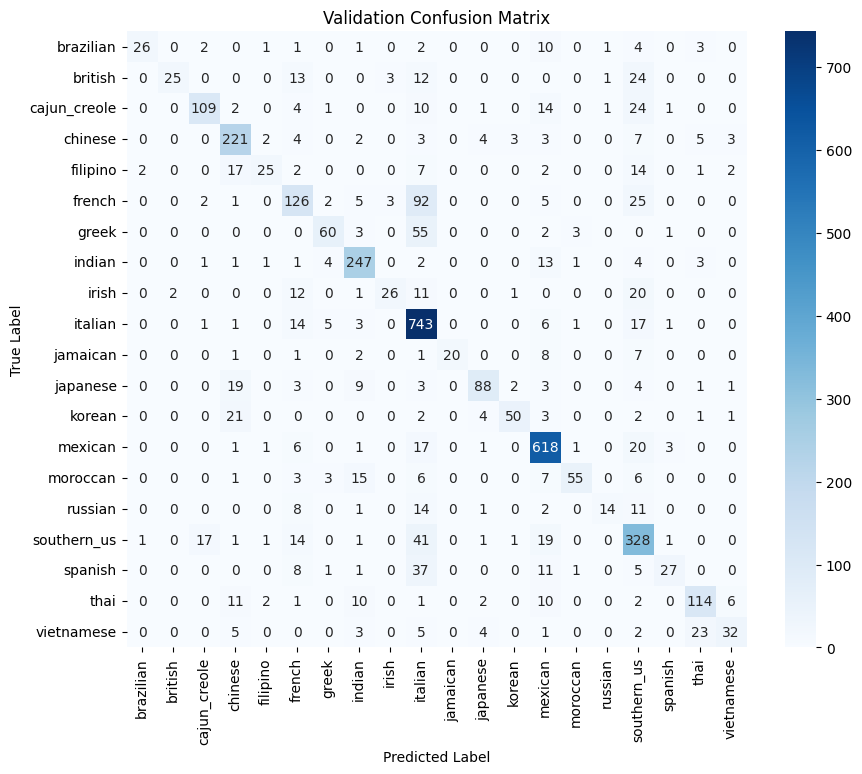

In [22]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()